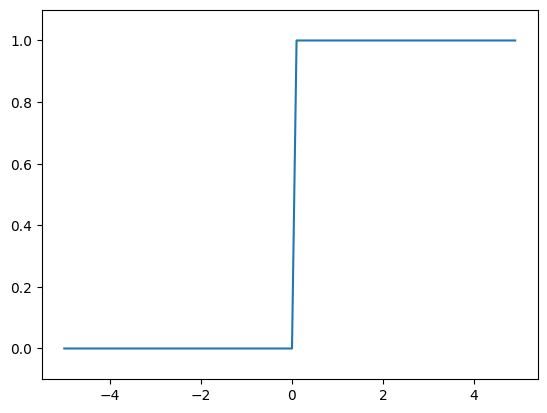

In [148]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int8)


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

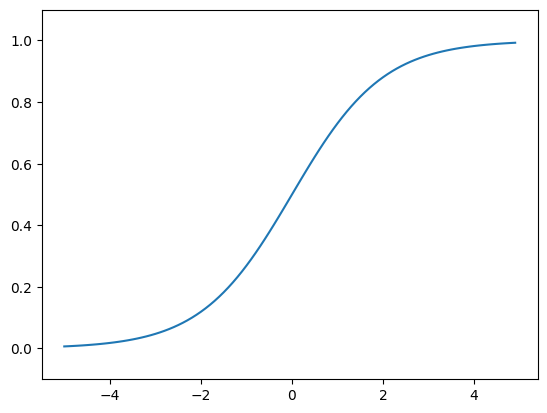

In [149]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

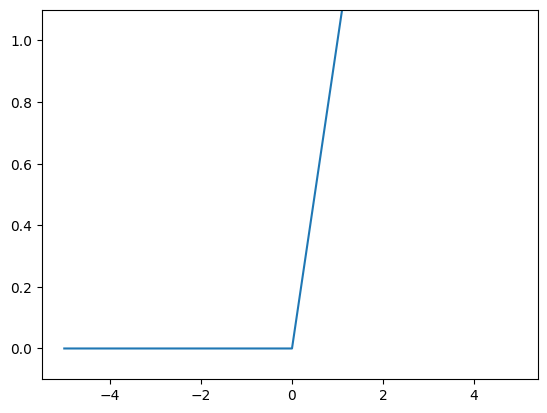

In [150]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)


x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [151]:
import numpy as np

A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))  # 配列の次元数
print(A.shape)

[1 2 3 4]
1
(4,)


In [152]:
import numpy as np

# 2次元配列
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [153]:
import numpy as np

# 行列積

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [154]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.dot(A, B))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


In [155]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
C = np.array([[1, 2], [3, 4]])
print(C)
# print(np.dot(A, C))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]]


In [156]:
import numpy as np

X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
print(np.dot(X, W))

[ 5 11 17]


### 3.4 3層ニューラルネットワークの実装

In [157]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


X = np.array([1.0, 0.5])  # 入力層
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 1層目の重み
B1 = np.array([0.1, 0.2, 0.3])  # 1層目のバイアス
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 2層目の重み
B2 = np.array([0.1, 0.2])  # 2層目のバイアス
A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)


def identity_function(x):
    return X


W3 = np.array([[0.1, 0.3], [0.2, 0.4]])  # 3層目の重み
B3 = np.array([0.1, 0.2])  # 3層目のバイアス
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[1.  0.5]


In [158]:
import numpy as np


def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 1層目の重み
    network["B1"] = np.array([0.1, 0.2, 0.3])  # 1層目のバイアス
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 2層目の重み
    network["B2"] = np.array([0.1, 0.2])  # 2層目のバイアス
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])  # 3層目の重み
    network["B3"] = np.array([0.1, 0.2])  # 3層目のバイアス
    return network


def forward(network, x):
    W1, B1 = network["W1"], network["B1"]
    W2, B2 = network["W2"], network["B2"]
    W3, B3 = network["W3"], network["B3"]

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def identity_function(x):
        return x

    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    return Y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 3.5 出力層の設計

ソフトマックス関数

In [159]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])  # ニューラルネットワークの出力
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)  # 指数関数の和
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [160]:
import numpy as np


def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


a = np.array([1010, 1000, 990])
print(softmax(a))

[nan nan nan]


/var/folders/88/d5x5_1md2ds25ffdjx7vndqr0000gn/T/ipykernel_7468/1420350169.py:5: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/88/d5x5_1md2ds25ffdjx7vndqr0000gn/T/ipykernel_7468/1420350169.py:7: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [161]:
import numpy as np


def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


a = np.array([1010, 1000, 990])
print(softmax(a))
print(np.sum(softmax(a)))  # 合計は1 → 確率として扱える

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


### 3.6 手書き数字認識

In [162]:
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
# img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


In [163]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False
    )
    return x_test, t_test


def init_network():
    with open("dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


バッチ処理

In [164]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [165]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False
    )
    return x_test, t_test


def init_network():
    with open("dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100  # バッチの数
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)  # 最も確率の高い要素のインデックスを取得
    accuracy_cnt += np.sum(p == t[i : i + batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [166]:
import numpy as np

x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3]])
print(np.argmax(x))
print(np.argmax(x, axis=1))

1
[1 2 1]
